# Primerjava podatkov o igri League of legends

Projekt pri predmetu Programiranje 1 namenjen primerjavi različnih junakov v priljubljeni računalniski igri League of legends

Patch 6.12

Spodaj bomo namesto besede League of legends uporabljali okrajšavo LOL

In [2]:
import pandas as pd
%matplotlib inline

podatki = pd.read_csv('podatki611.csv', index_col='title')
pd.options.display.max_rows = 20

Igra LOL je priljubljena računalniška igra, v kateri se spopadeta dve ekipi (vsaka s po petimi igralci). Vsak izmed igralcev si izbere svojega junaka (champion), in vsak junak ima svoje posebne zmožnosti. V vsaki ekipi si igralci praviloma razdelijo pet razlicnih nalog (role: top-lane, mid-lane, ADC, support, in pa jungle). Cilj vsake ekipe pa je uničiti nasprotnikovo središče (Nexus). Ekipam to prepecujejo minioni in pa stolpi. Ko igralci uničijo stolpe, ali pa ubijejo minione, ter pripomorejo pri uboju nasprotnikovih junakov, dobijo za to zlato, ki ga lahko v bazi zamenjajo za predmete, ki jih naredijo močnejše.

In [3]:
podatki.head(10)

,totalDamageTaken,minionsKilled,overallPositionChange,assists,banRate,winPercent,neutralMinionsKilledTeamJungle,role,experience,totalDamageDealtToChampions,neutralMinionsKilledEnemyJungle,goldEarned,kills,deaths,largestKillingSpree,playPercent,key,overallPosition,totalHeal
title,,,,,,,,,,,,,,,,,,,
Yorick,36615,176.1,2,7.46,0.10,48.85,4.04,Top,23.48,27686,2.13,12022,4.87,6.32,2.22,0.44,Yorick,54,14413
Urgot,20774,183.4,1,6.68,0.13,51.67,4.11,Top,94.03,22741,1.51,12320,6.29,6.23,2.83,0.33,Urgot,52,2016
Mordekaiser,19768,185.4,-3,6.13,0.11,48.77,5.83,Top,94.83,23421,3.41,12470,6.08,6.76,2.81,0.50,Mordekaiser,57,10768
Nunu,33754,155.1,0,8.07,0.11,43.42,5.83,Top,29.27,16586,2.80,11302,4.03,6.47,1.86,0.12,Nunu,62,10030
Aatrox,32508,191.3,-1,6.48,0.19,46.87,7.49,Top,113.04,19950,4.77,12708,5.76,5.97,2.83,0.66,Aatrox,53,15433
Heimerdinger,20431,202.9,-1,6.32,0.10,46.83,2.60,Top,236.19,25023,1.33,12102,4.04,6.12,1.79,0.57,Heimerdinger,56,1470
Karthus,25950,207.4,-30,8.85,0.10,46.42,9.02,Top,109.00,32360,2.34,13645,7.13,7.43,2.66,0.22,Karthus,48,5554
Galio,30590,196.6,-2,10.21,0.17,51.75,2.78,Top,42.16,21544,1.30,12165,4.30,5.12,2.17,0.34,Galio,28,9538
Singed,37884,216.7,-1,8.52,0.10,51.16,1.74,Top,131.07,23775,2.07,12681,4.30,6.54,1.95,1.49,Singed,21,5158


In [4]:
podatki['winPercent']

title
Yorick          48.85
Urgot           51.67
Mordekaiser     48.77
Nunu            43.42
Aatrox          46.87
Heimerdinger    46.83
Karthus         46.42
Galio           51.75
Singed          51.16
Cassiopeia      53.69
                ...  
Nami            51.27
Lux             46.36
Leona           51.34
Bard            49.58
Trundle         51.16
Janna           53.09
Soraka          51.96
Braum           51.15
Thresh          48.88
Morgana         50.29
Name: winPercent, dtype: float64

In [5]:
podatki.sort_values(['winPercent'],ascending=[False])[['winPercent','role']]

,winPercent,role
title,,
Malzahar,55.48,Middle
Zilean,54.97,Middle
Swain,54.82,Middle
Miss Fortune,54.49,ADC
Karthus,54.47,Middle
Anivia,54.41,Middle
Volibear,54.39,Jungle
Ashe,54.36,ADC
Quinn,54.19,Top


Po mojem mnenju je ena bolj zanimivih nalog jungle. Vsebuje namreč več različnih načinov igranja in premore več različnih načinov pridobivanja zlata.

In [6]:
podatki.groupby('role').size()

role
ADC        18
Jungle     46
Middle     49
Support    26
Top        62
dtype: int64

## Jungle

In [7]:
jungle = podatki[podatki.role == 'Jungle']
jungle

,totalDamageTaken,minionsKilled,overallPositionChange,assists,banRate,winPercent,neutralMinionsKilledTeamJungle,role,experience,totalDamageDealtToChampions,neutralMinionsKilledEnemyJungle,goldEarned,kills,deaths,largestKillingSpree,playPercent,key,overallPosition,totalHeal
title,,,,,,,,,,,,,,,,,,,
Rammus,33565,41.9,-4,11.91,0.75,51.25,58.09,Jungle,61.67,15250,6.51,11315,4.34,5.37,2.09,2.36,Rammus,31,7784
Shyvana,34443,61.8,5,7.83,0.23,51.29,77.00,Jungle,47.06,18251,15.95,13180,6.49,5.18,3.32,2.77,Shyvana,10,7830
Olaf,38290,56.7,-1,8.74,0.28,49.78,64.51,Jungle,44.14,18791,10.43,12484,6.79,5.66,3.28,0.68,Olaf,24,9141
Malzahar,18703,58.7,2,9.89,36.31,50.87,61.24,Jungle,20.92,19721,7.41,12040,5.21,5.14,2.49,0.68,Malzahar,26,3738
Poppy,30341,45.7,-2,9.47,0.62,43.62,55.13,Jungle,39.72,16074,7.68,11449,5.27,5.74,2.48,0.43,Poppy,46,5700
Sejuani,37564,47.2,-2,12.00,0.14,52.09,65.37,Jungle,53.24,15839,8.41,11889,4.90,4.75,2.59,3.61,Sejuani,18,7902
Fiddlesticks,30322,45.5,0,10.05,1.37,52.27,71.44,Jungle,90.79,19051,8.02,12261,6.11,5.88,2.98,3.72,FiddleSticks,9,16545
Kayle,28684,78.9,7,7.68,0.60,51.34,69.54,Jungle,111.46,18073,9.77,12779,6.24,5.68,2.91,0.57,Kayle,30,11657
Wukong,29180,52.1,-4,8.51,0.25,52.54,64.59,Jungle,105.08,18490,8.16,12447,7.36,5.76,3.45,2.85,MonkeyKing,23,7501


In [8]:
jungle.sort_values(['winPercent'],ascending=[False])[['winPercent','playPercent']]

,winPercent,playPercent
title,,
Volibear,54.39,6.30
Sion,53.93,0.38
Hecarim,53.62,6.51
Skarner,53.50,1.93
Amumu,53.28,6.86
Kindred,52.70,9.35
Wukong,52.54,2.85
Fiddlesticks,52.27,3.72
Sejuani,52.09,3.61


Spodnji graf prikazuje razporeditev najbolj igranih junakov v jungli. Če je procent igranja junaka manjši od 1 procenta, potem ga ignoriramo (ponavadi gre namrec za t.i. "torle", ki bolj ali manj le uničujejo statistiko)

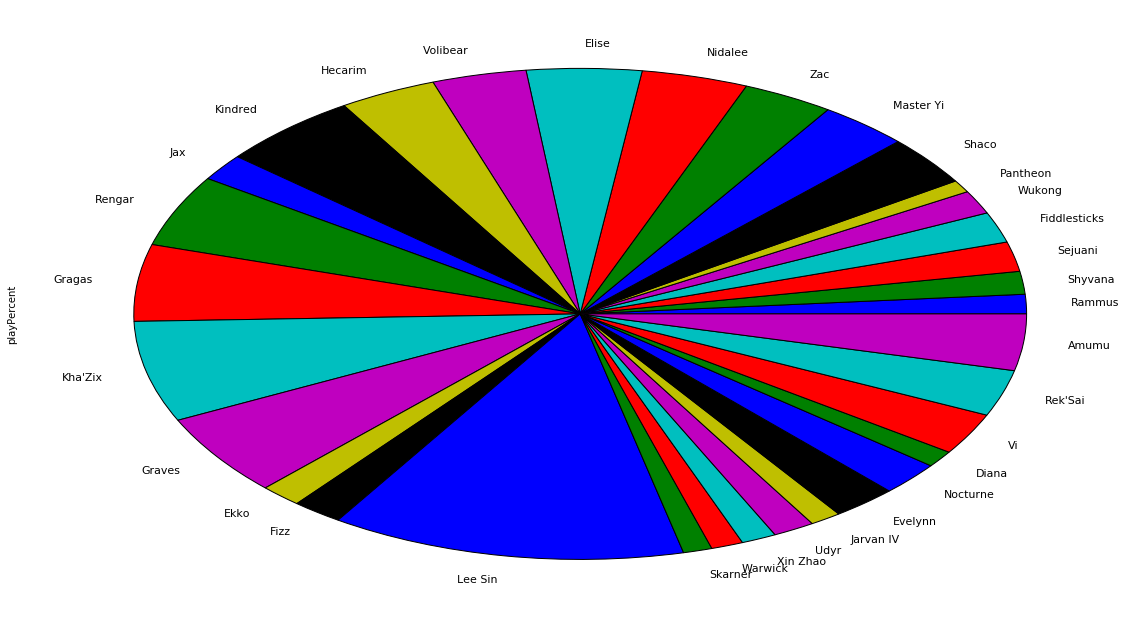

In [9]:
jungle[(jungle.playPercent > 1)]['playPercent'].plot(kind='pie',fontsize=11,figsize=(20,11))

In [10]:
lee = jungle.loc['Lee Sin']
lee

totalDamageTaken                    31418
minionsKilled                        39.1
overallPositionChange                  -2
assists                              9.48
banRate                              2.54
winPercent                          47.05
neutralMinionsKilledTeamJungle      60.37
role                               Jungle
experience                          88.38
totalDamageDealtToChampions         15396
neutralMinionsKilledEnemyJungle     10.21
goldEarned                          11852
kills                                6.65
deaths                               6.03
largestKillingSpree                  3.12
playPercent                         23.72
key                                LeeSin
overallPosition                        28
totalHeal                            6922
Name: Lee Sin, dtype: object

Zgornja razpredelnica prikazuje tipe podatkov, ki jih vemo o posameznem junaku.

Naslednji graf nam prikazuje razmerje med popularnostjo junka in njegovo procentualno uspesnostjo v igrah.

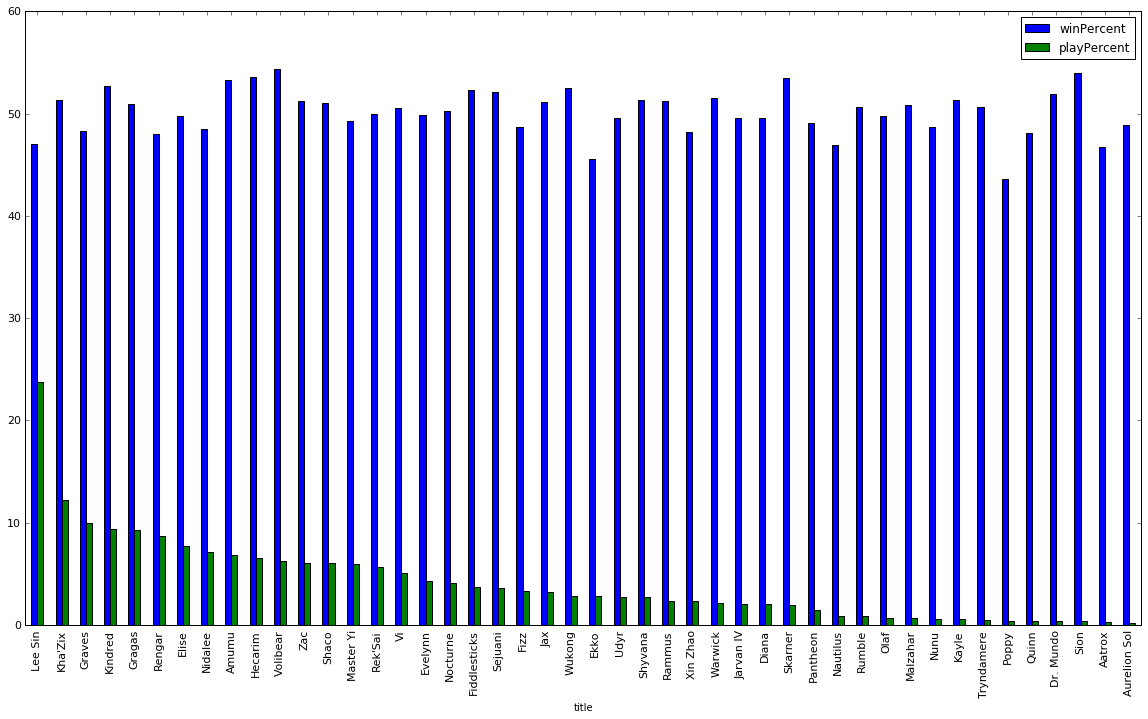

In [11]:
jungle.sort_values(['playPercent'],ascending=[False])[['winPercent','playPercent']].plot(kind='bar',fontsize=11,figsize=(20,11))
#jungle.groupby('playPercent','winPercent').size().plot(kind='bar', fontsize=11,figsize=(20,11))

Opazimo lahko, da razmerje med popularnostjo in uspešnostjo v nasprotju z pricakovanji ni ravno odvisno. Bolj popularni junaki niso nujno bolj uspešni. To bi pripisal predvsem temu, da so nekateri junaki zahtevnejši za igro, in pa da jim popularnos povečujejo nekateri znani igralci, ki igrajo z popularnimi junaki na visokem nivoju (Na primer igralec Gripex je precej znan in uspešen kot junak Lee Sin).
Spet drugi junaki, ki so sicer igrani bolj poredko, pa imajo visok procent uspesnosti. To bi pripisal predvsem temu, da te junake v večini izberejo le igralci, ki igrajo samo s tem junakom (Vaja dela mojstra). 

Zanimiva je tudi primerjava med popularnostjo in škodo, ki jo junak povzroči nasprotni ekipi (playPercent in totalDamageDealtToChampions) in pa podoben graf primerjave med uspešnostjo in povzročeno škodo. 

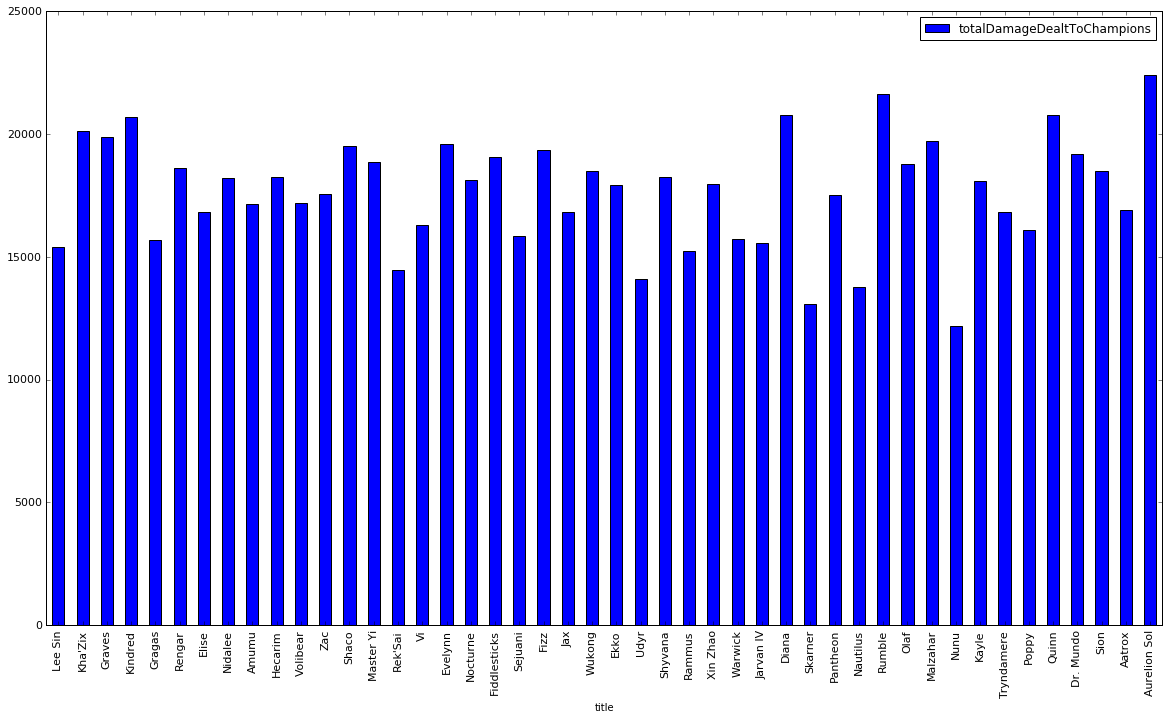

In [12]:
jungle.sort_values(['playPercent'],ascending=[False])[['totalDamageDealtToChampions']].plot(kind='bar',fontsize=11,figsize=(20,11))

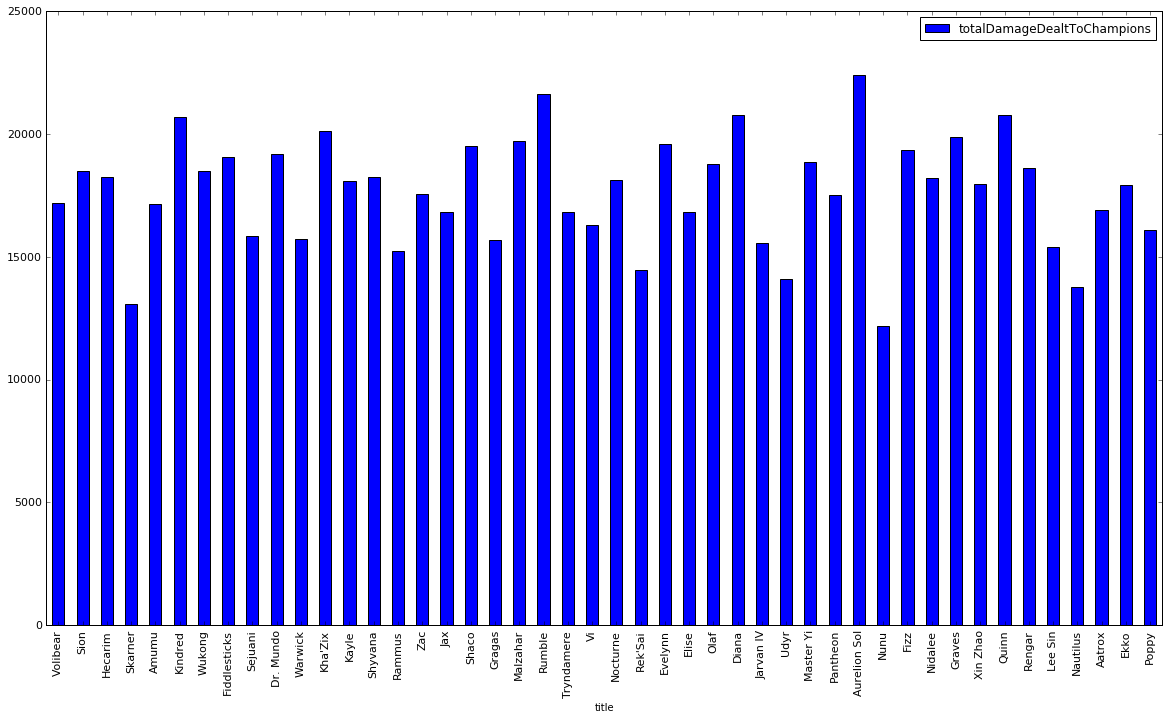

In [13]:
jungle.sort_values(['winPercent'],ascending=[False])[['totalDamageDealtToChampions']].plot(kind='bar',fontsize=11,figsize=(20,11))

Opazimo, da grafa v nasprotju z pričakovanjem, ne prikazujeta neke očitne korelacije med škodo, ki jo junaki povzročijo in njihovo popularnostjo v igrah, oz njihovo uspešnostjo.

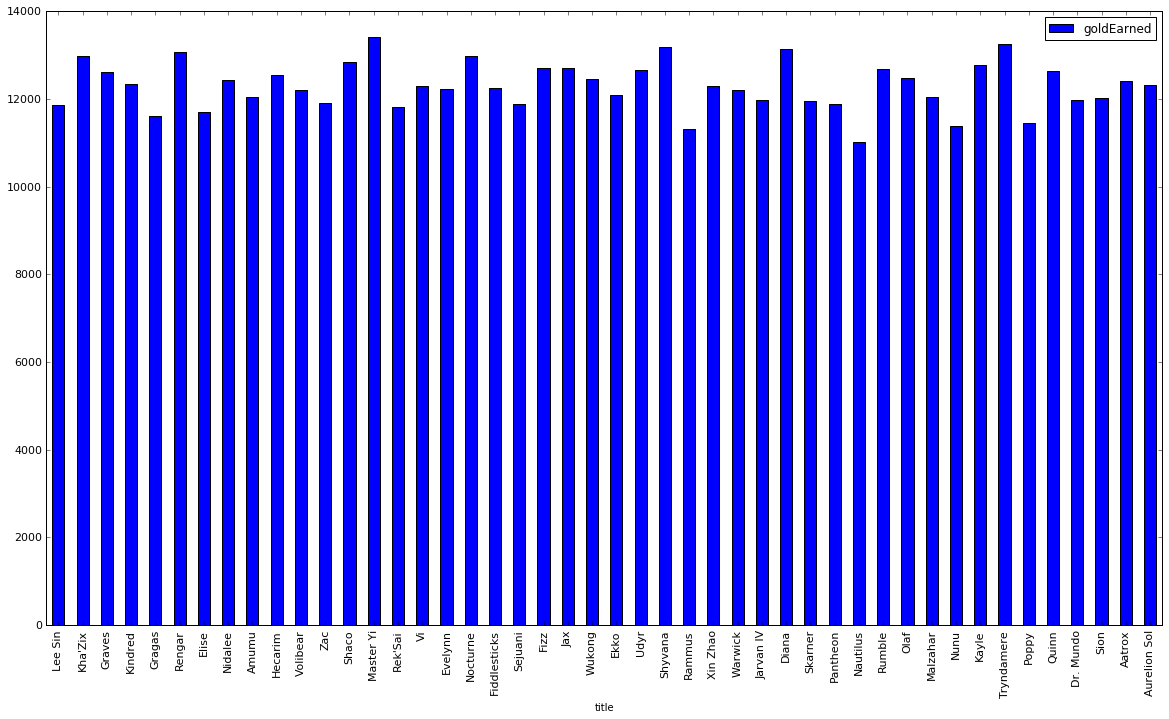

In [14]:
jungle.sort_values(['playPercent'],ascending=[False])[['goldEarned']].plot(kind='bar',fontsize=11,figsize=(20,11))

Zgornji graf prikazuje razmerje med popularnostjo junaka in pa zasluženim zlatom v igri.


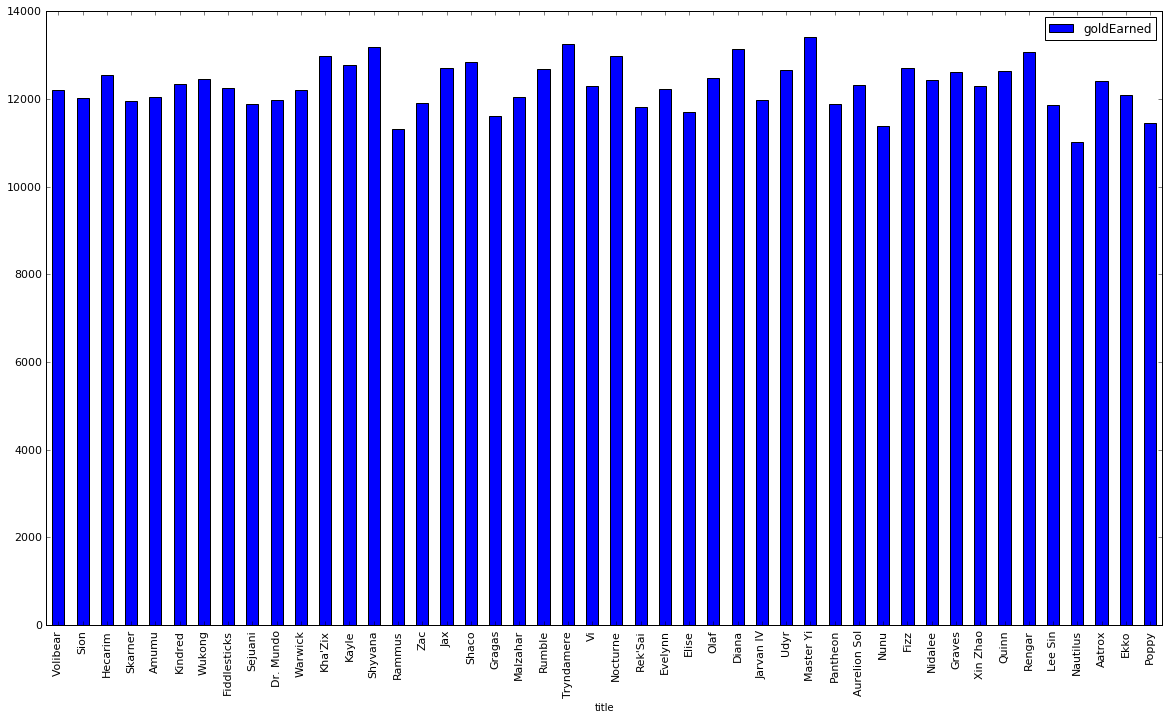

In [15]:
jungle.sort_values(['winPercent'],ascending=[False])[['goldEarned']].plot(kind='bar',fontsize=11,figsize=(20,11))

In [14]:
jungle["goldEarned"].mean()

12304.260869565218

Zgornji graf prikazuje razmerje med uspešnostjo junakov v jungli in pa zlatom, ki ga le te zaslužijo. Opazimo lahko, da je graf nagnjen nekoliko bolj v levo, kot bi tudi pricakovali.

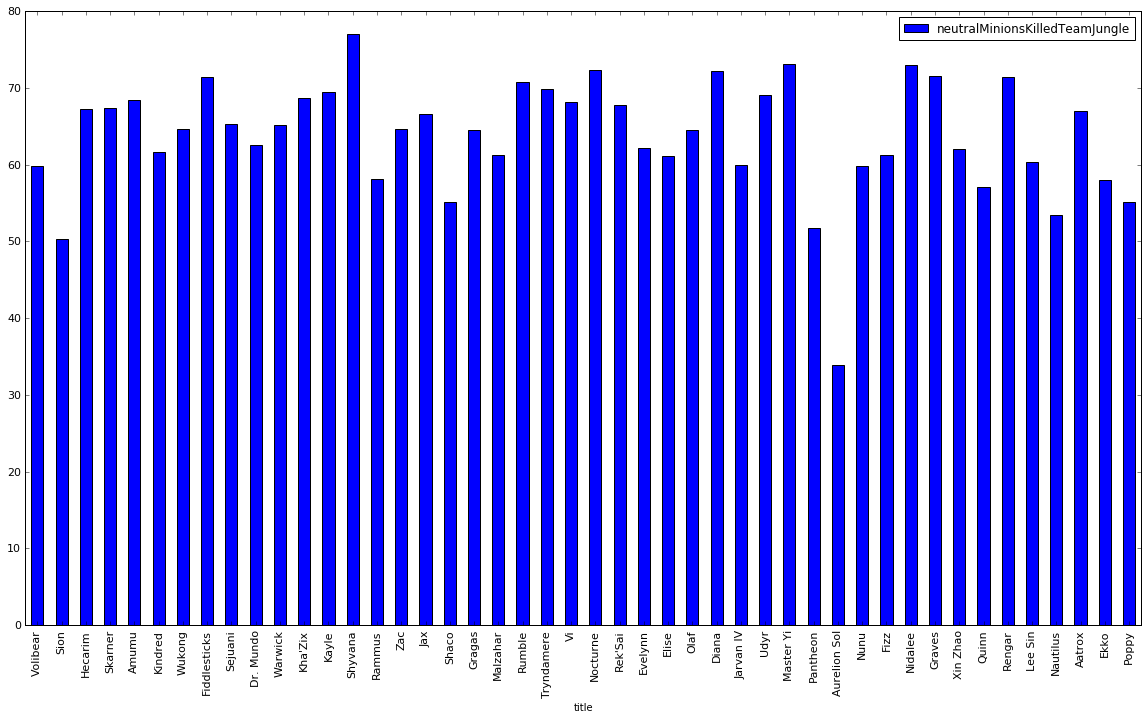

In [25]:
jungle.sort_values(['winPercent'],ascending=[False])[['neutralMinionsKilledTeamJungle']].plot(kind='bar',fontsize=11,figsize=(20,11))

Zgornji graf prikazuje razmerje med uspešnostjo junakov zadolženih za JUNGLE v igri, in pa količino "jungle" minionov, ki jih ubijejo v svoji "jungli". Opazimo lahko, da so morda nekoliko bolj uspešni junaki, ki ubijejo več minionov v lastni "jungli".

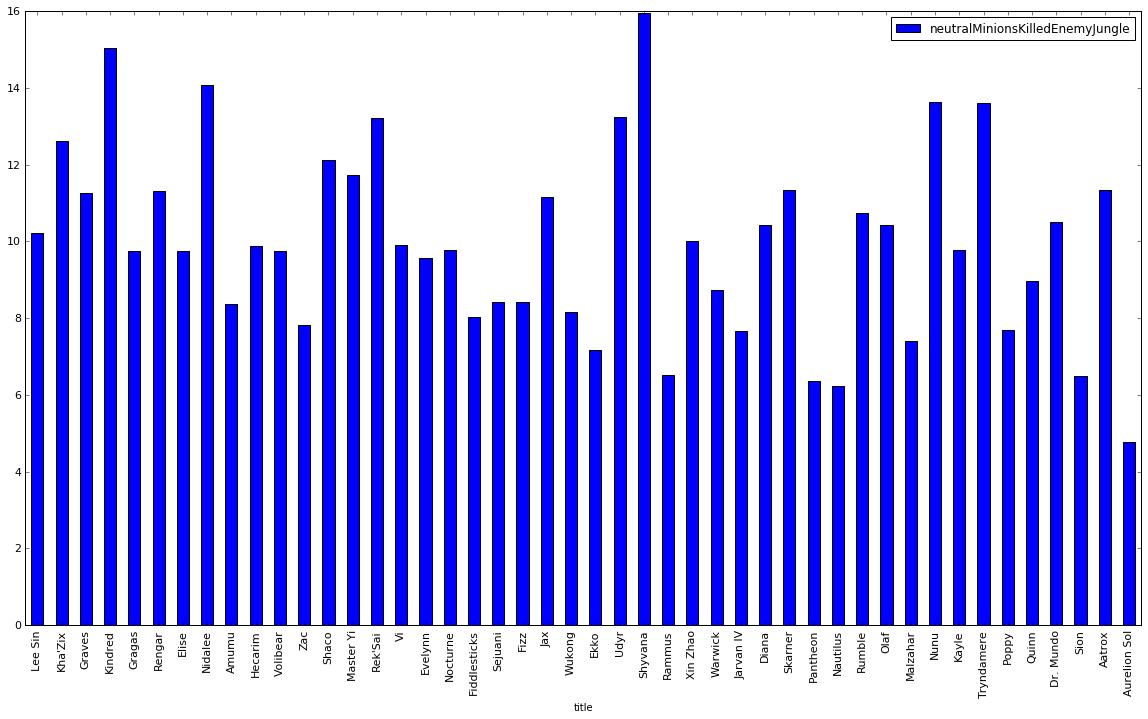

In [16]:
jungle.sort_values(['playPercent'],ascending=[False])[['neutralMinionsKilledEnemyJungle']].plot(kind='bar',fontsize=11,figsize=(20,11))

Zgornji graf prikazuje razmerje med popularnostjo junakov in pa količino ubitih minionov v nasprotnikovi "jungli". Opazimo, da je graf naravnan bolj na levo in zato sklepamo, da so junaki popularnejši, če imajo večjo možnost krasti minione iz nasprotnikove jungle.

Zgornja dva grafa nam pokažeta, da so junaki ki so bolj dovzetni za ubijanje minionov v lastni jungli bolj uspešni v svojih igrah, vendar pa so junaki bolj popularni, če lahko ukradejo vec minionov iz nasprotnikove jungle. Tak rezultat je precej pričakovan, kajti igra, ko igralec krade minione iz nasprotnikove jungle, je bolj vznemerljiva in zato zabavnejša, vendar pa ne nujno vedno tudi učinkovitejša.

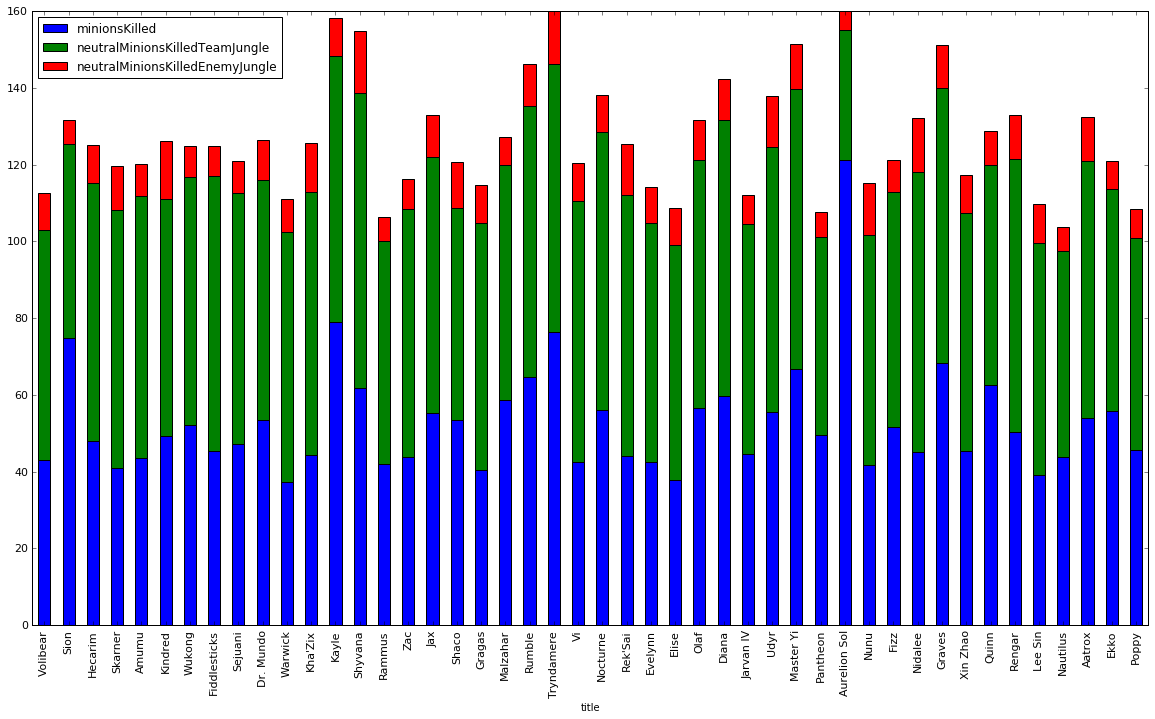

In [27]:
graf = jungle.sort_values(['winPercent'],ascending=[False])[['minionsKilled','neutralMinionsKilledTeamJungle','neutralMinionsKilledEnemyJungle']].plot(kind='bar',stacked=True,fontsize=11,figsize=(20,11))
graf

Zgornji graf prikazuje razmerje med uspesnostjo junaka v igri, in pa ubitimi minioni. Opazimo da v grafu ni neke korelacije, in iz tega sklepamo da je bil v tem obdobju v jungli bolj fokus na ubijanje nasprotnikov, kot pa na ubijanju minionov.

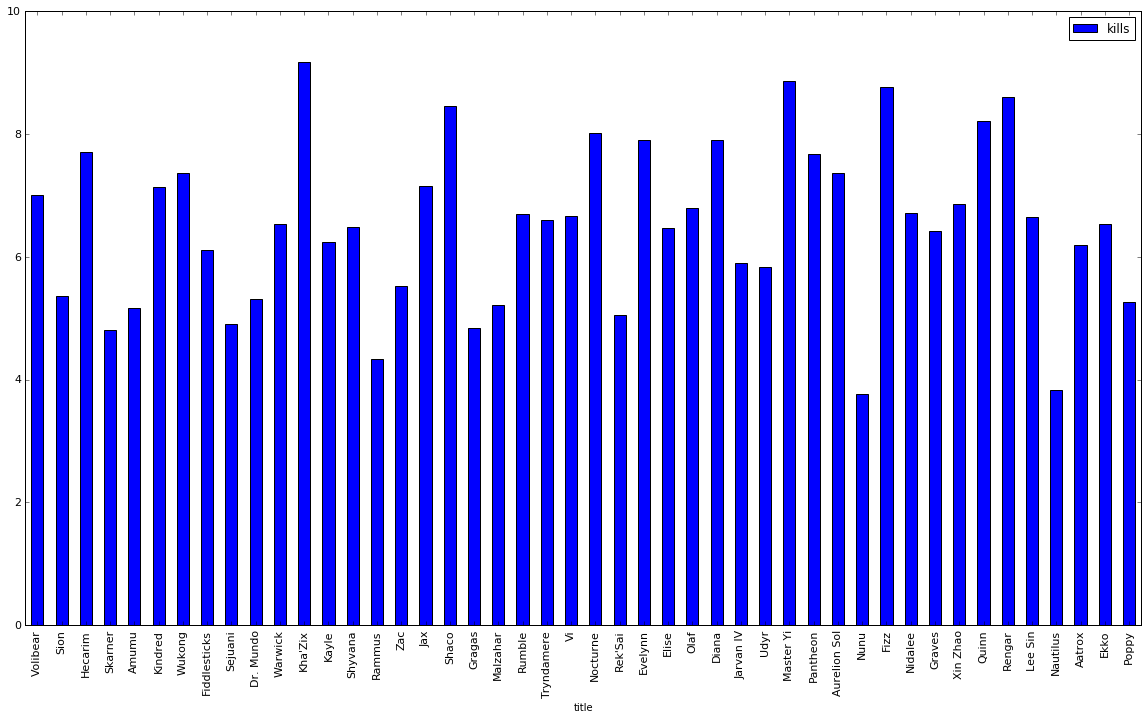

In [30]:
graf = jungle.sort_values(['winPercent'],ascending=[False])[['kills']].plot(kind='bar',fontsize=11,figsize=(20,11))
graf

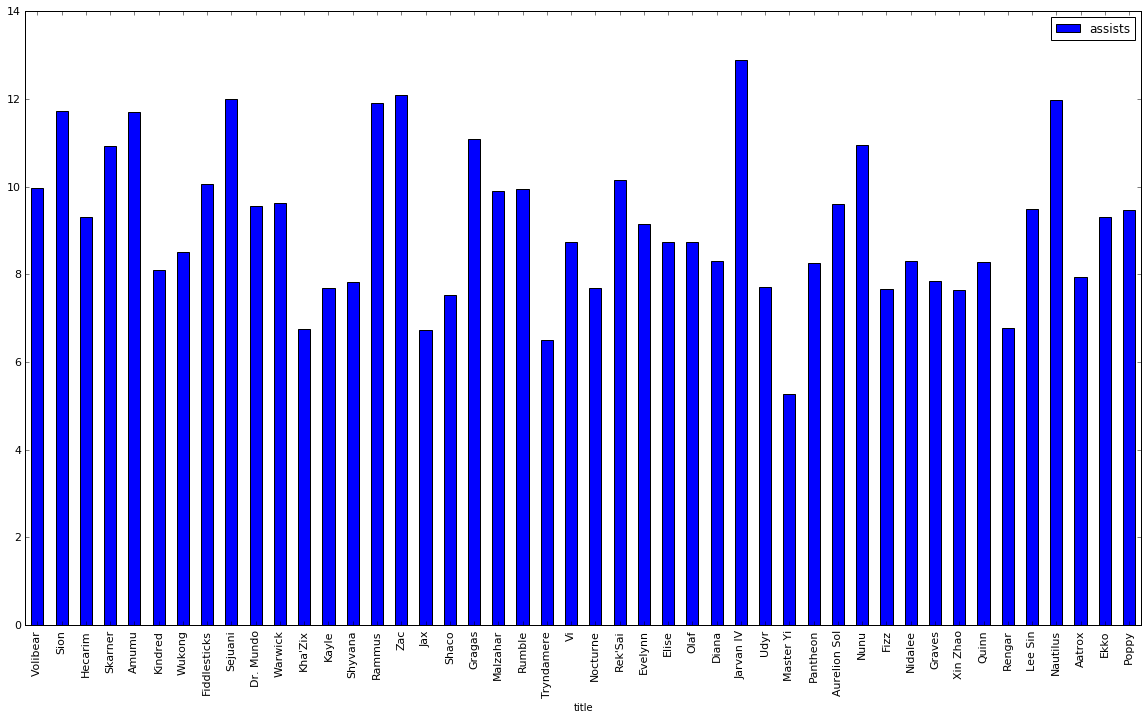

In [32]:
graf = jungle.sort_values(['winPercent'],ascending=[False])[['assists']].plot(kind='bar',stacked=True,fontsize=11,figsize=(20,11))
graf

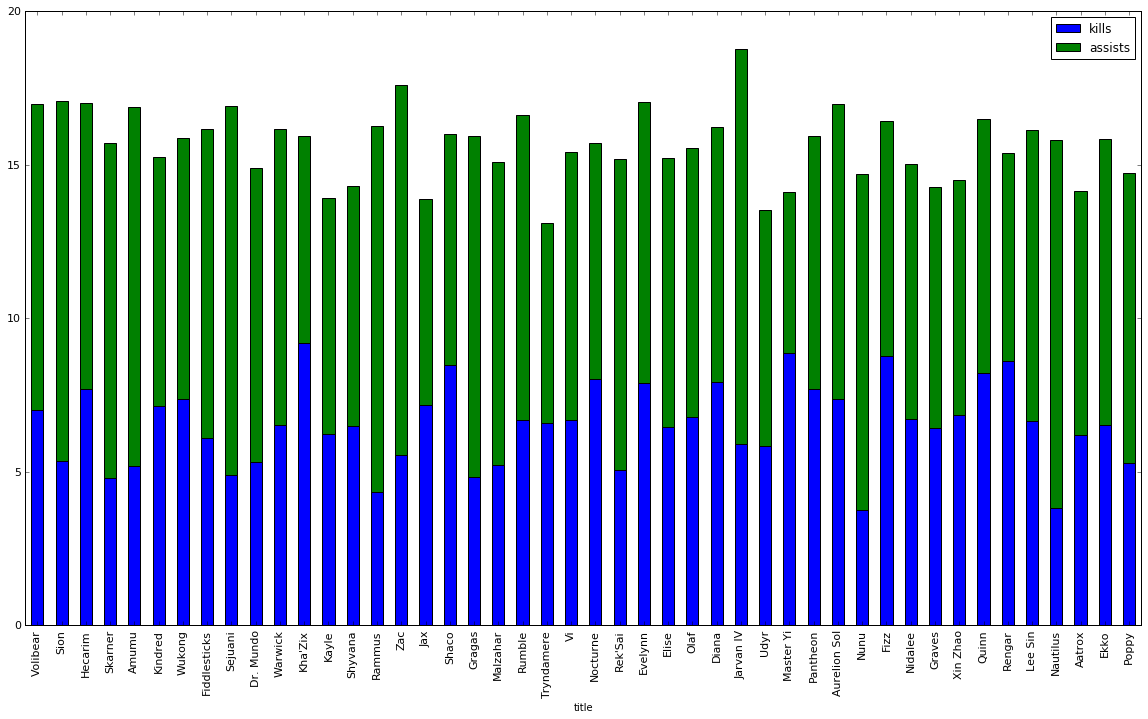

In [33]:
graf = jungle.sort_values(['winPercent'],ascending=[False])[['kills','assists']].plot(kind='bar',stacked=True,fontsize=11,figsize=(20,11))
graf

Zgornji trije grafi po vrsti opisujejo razmerje med procentom uspešnosti junaka v igri in pa uboji (V prvem primeru), Pomocmi pri ubojih (drugi primer), in vsoto obeh dveh podatkov. Morda je graf pri asistih bolj nagnjen v levo, kot tisti pri ubojih. Najbolj po pricakovanjih pa se obnasa graf vsote. Iz tega grafa lahko opazimo da je bilo v tem obdobju bolj efektivno igrat junake, ki lahko veliko sodelujejo pri ubojih.

## ADC

V naslednjem sklopu si bomo ogledali podobno analizo vloge, ki bi po mojem mnenju morala vsebovati največ korelacij med uspešnostjo junakov in ostalimi podatki. (Bolj kot jungle). To je ADC. Naloga ADC-jev oz Attack damage carry-ev, je v tem, da v igri ubijajo nasprotnike. Ni jim tako zelo skrbeti za svoje preživetje, saj je to ena izmed nalog supportov, zato se lahko bolj prilagodijo nabavi predmetov, ki jim dajo več moči (ne skrbijo pa za njihovo prezivetje).



In [17]:
adc = podatki[podatki.role == 'ADC']
adc

,totalDamageTaken,minionsKilled,overallPositionChange,assists,banRate,winPercent,neutralMinionsKilledTeamJungle,role,experience,totalDamageDealtToChampions,neutralMinionsKilledEnemyJungle,goldEarned,kills,deaths,largestKillingSpree,playPercent,key,overallPosition,totalHeal
title,,,,,,,,,,,,,,,,,,,
Urgot,20303,180.4,-2,7.83,0.13,46.32,5.96,ADC,37.39,21594,1.69,12432,6.79,6.20,3.21,0.18,Urgot,18,3482
Kog'Maw,20507,199.7,0,7.44,0.27,53.36,11.94,ADC,28.10,27024,2.86,13874,8.65,6.86,3.65,1.86,KogMaw,6,3624
Quinn,22519,185.3,0,8.46,0.31,52.03,7.92,ADC,91.14,23971,2.88,13474,8.49,7.12,3.69,0.47,Quinn,11,3373
Corki,21772,194.6,1,8.19,0.28,44.54,9.42,ADC,31.63,24182,2.56,13027,6.99,6.13,3.26,1.96,Corki,16,3556
Kalista,21868,189.2,1,7.12,0.14,45.85,9.92,ADC,63.36,19978,3.59,12788,7.22,6.78,3.25,3.24,Kalista,17,3910
Varus,19419,198.5,-1,8.57,0.05,49.54,8.50,ADC,36.03,24974,2.69,13413,7.57,6.56,3.36,1.62,Varus,14,3157
Tristana,20757,201.8,0,6.84,0.04,48.38,9.70,ADC,39.61,21912,3.00,13463,7.78,5.89,3.59,5.22,Tristana,15,3185
Draven,22006,191.3,-3,6.96,0.26,49.81,9.07,ADC,109.08,23974,3.18,14225,7.91,6.79,3.44,5.69,Draven,13,2671
Ashe,18661,196.9,2,8.99,0.17,54.36,9.60,ADC,44.59,22886,2.89,13196,6.87,6.28,3.15,5.97,Ashe,10,2979


In [18]:
adc.sort_values(['winPercent'],ascending=[False])[['winPercent','playPercent']]

,winPercent,playPercent
title,,
Miss Fortune,54.49,7.16
Ashe,54.36,5.97
Kog'Maw,53.36,1.86
Twitch,53.27,6.92
Jinx,53.25,11.84
Sivir,53.05,9.18
Quinn,52.03,0.47
Jhin,51.89,12.35
Caitlyn,50.42,25.87


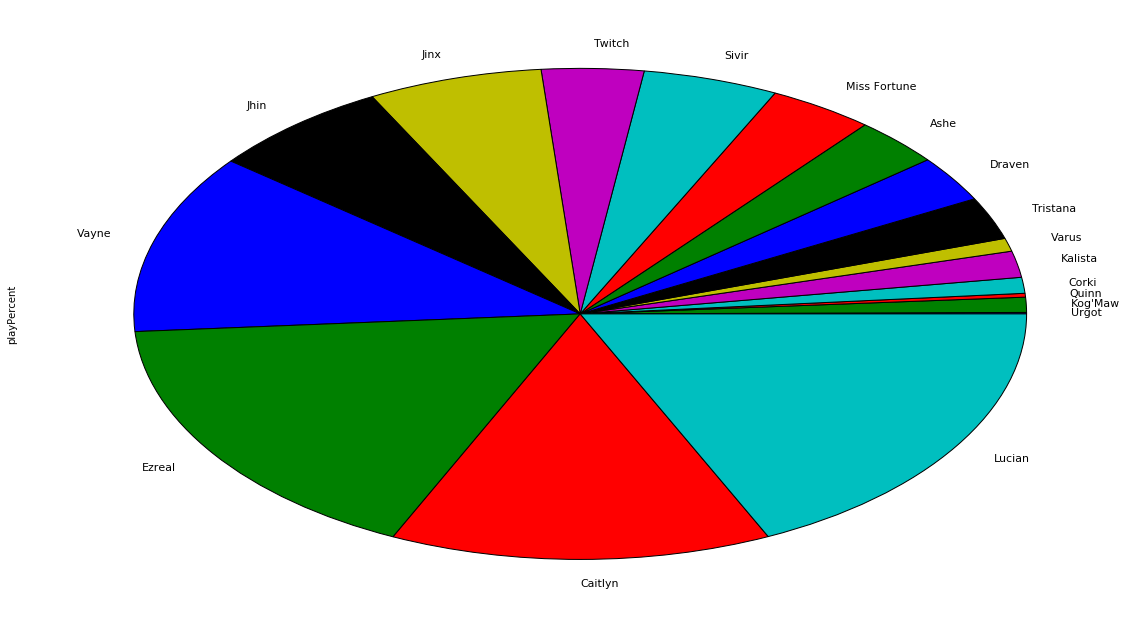

In [19]:
adc['playPercent'].plot(kind='pie',fontsize=11,figsize=(20,11))

Takoj opazimo, da le trije najbolj igrani junaki predstavljajo skoraj 50% vseh izbir. Za razliko od jungle junakov, je med ADC junaki veliko manj raznolikosti. 

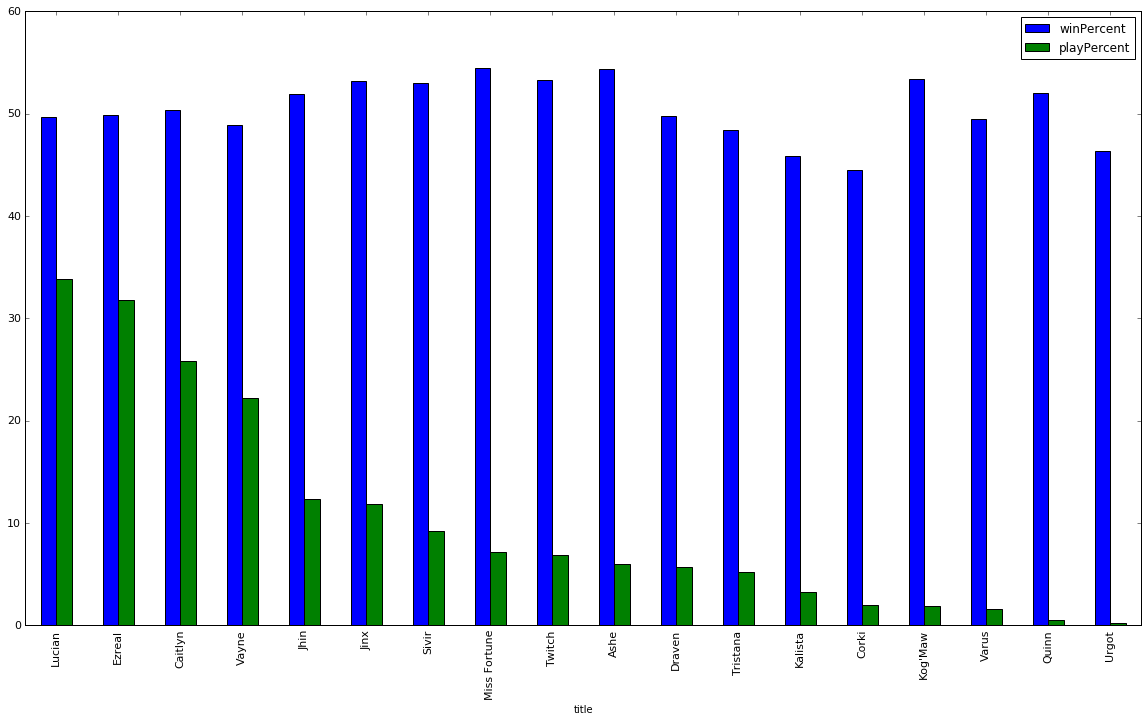

In [20]:
adc.sort_values(['playPercent'],ascending=[False])[['winPercent','playPercent']].plot(kind='bar',fontsize=11,figsize=(20,11))

Zgornji graf je nagnjen nekoliko bolj v levo, vendar pa v nasprotju z pričakovanim manj popularni junaki nimajo slabše uspešnosti. To bi spet pripisal predvsem temu, da te junake večinoma igrajo le ljudje ki igrajo le te junake, in lahko zato na njih dosežejo boljše rezultate kot večina ostalih ljudi.

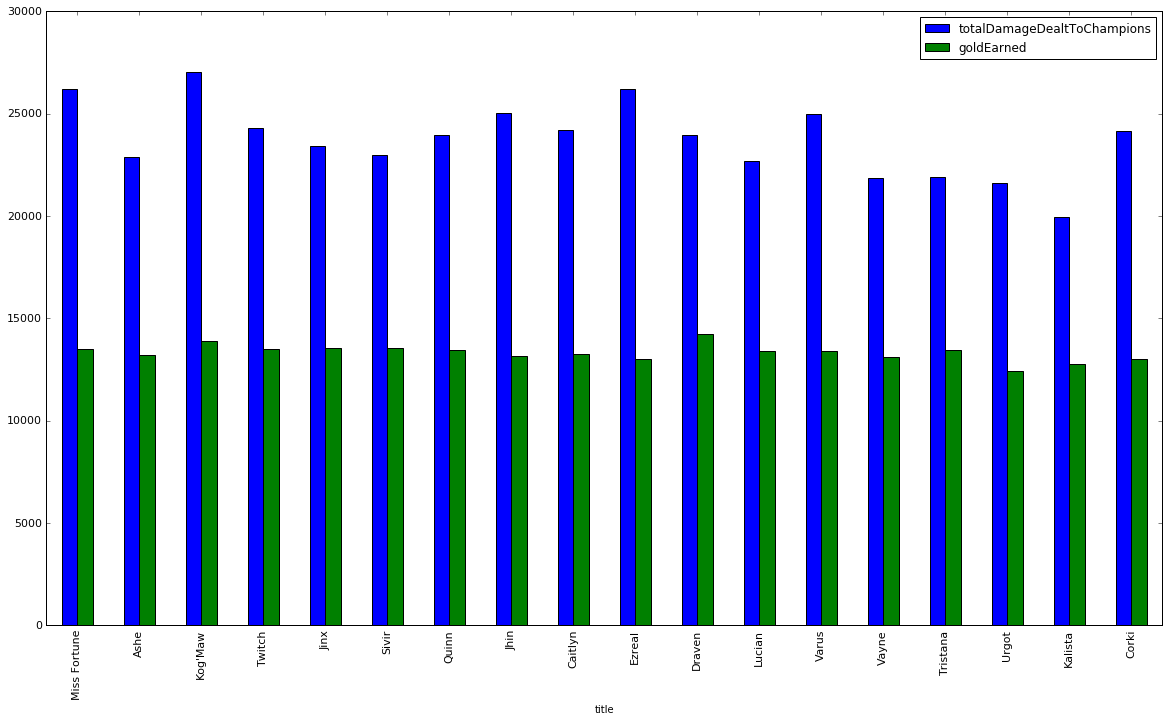

In [21]:
adc.sort_values(['winPercent'],ascending=[False])[['totalDamageDealtToChampions','goldEarned']].plot(kind='bar',fontsize=11,figsize=(20,11))

Zgornji graf prikazuje razmerje med tem koliko škode junaki povzročijo nasprotniku in pa koliko zlata zaslužijo. (Graf je urejen po padajoči vrednosti procenta zmage). Opazimo, da neke jasne koralacije ni, morda predvsem zaradi tega, ker je povzročena škoda precej odvisna od tipa junaka, ki ga igramo. Nekateri junaki ne naredijo toliko škode, zato pa morda toliko več prinesejo k skupni moči ekipe.

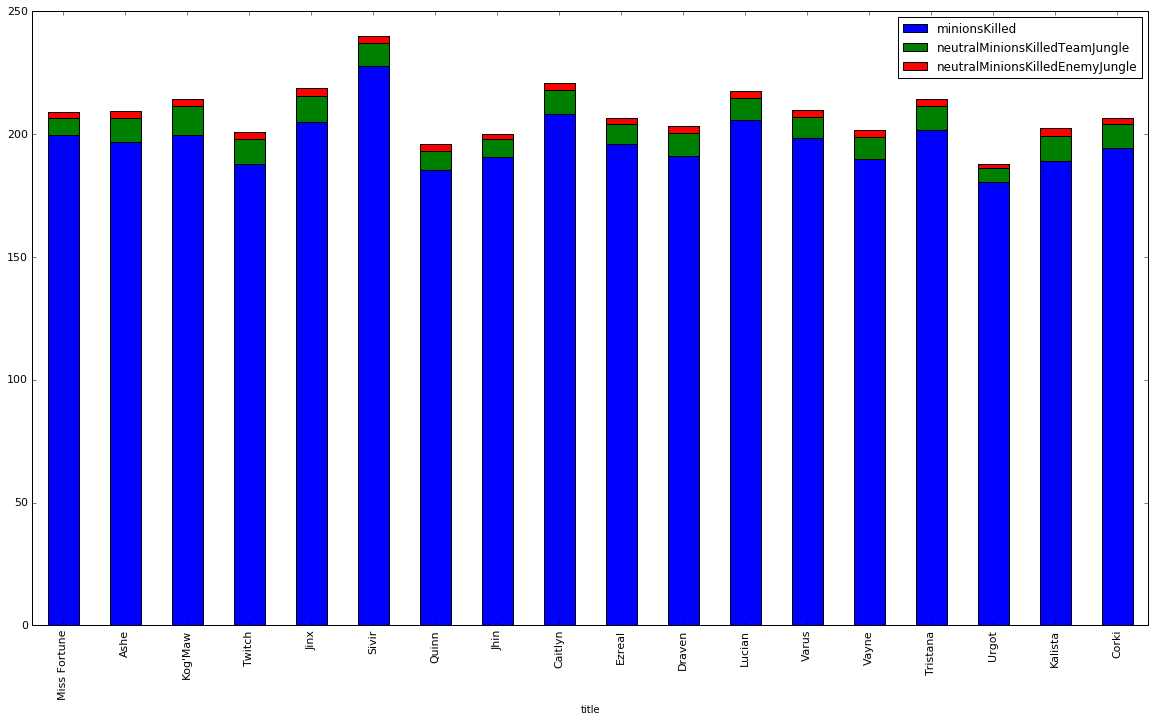

In [22]:
adc.sort_values(['winPercent'],ascending=[False])[['minionsKilled','neutralMinionsKilledTeamJungle','neutralMinionsKilledEnemyJungle']].plot(kind='bar',stacked=True,fontsize=11,figsize=(20,11))

Zgornji graf prikazuje razmerje med uspešnostjo junaka v igri in pa količino ubitih minionov. Opazimo lahko predvsem, da junaki, ki so zadolženi za ADC, ne ubijajo ravno veliko "jungle" minionov.

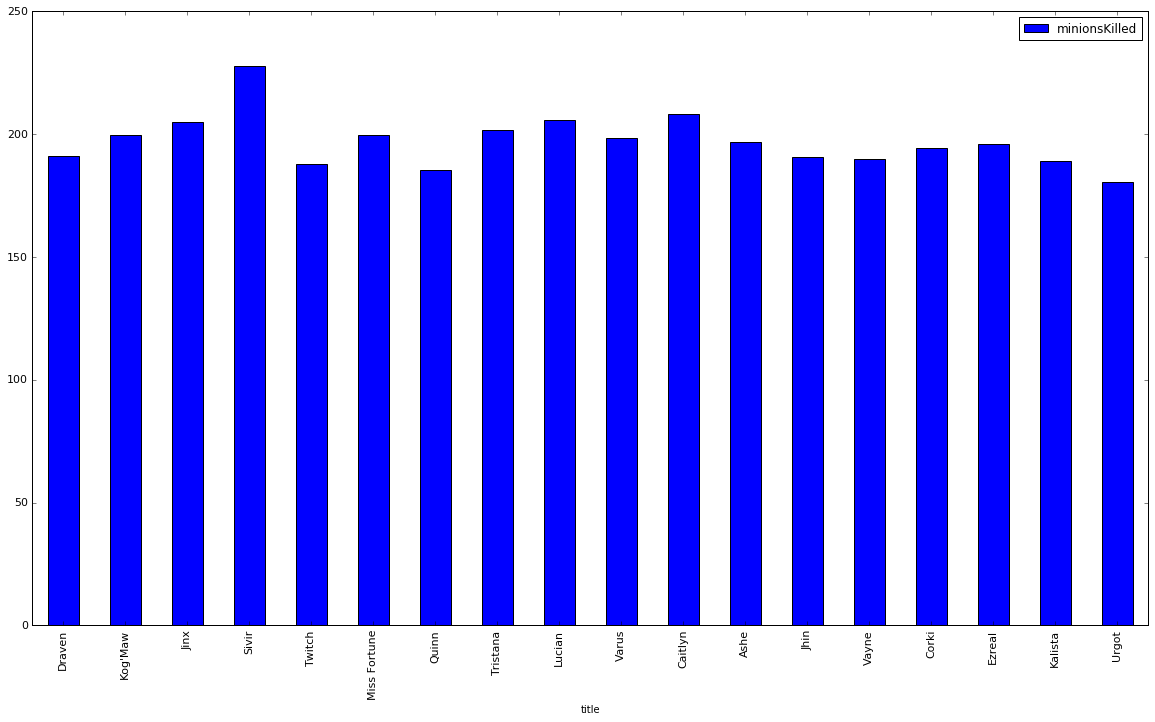

In [27]:
adc.sort_values(['goldEarned'],ascending=[False])[['minionsKilled']].plot(kind='bar',fontsize=11,figsize=(20,11))

Graf prikazuje razmerje med zasluženim zlatom, in pa minioni, ki jih junak ubije v igri. Opazimo, da je graf nagnjen nekoliko bolj v levo.

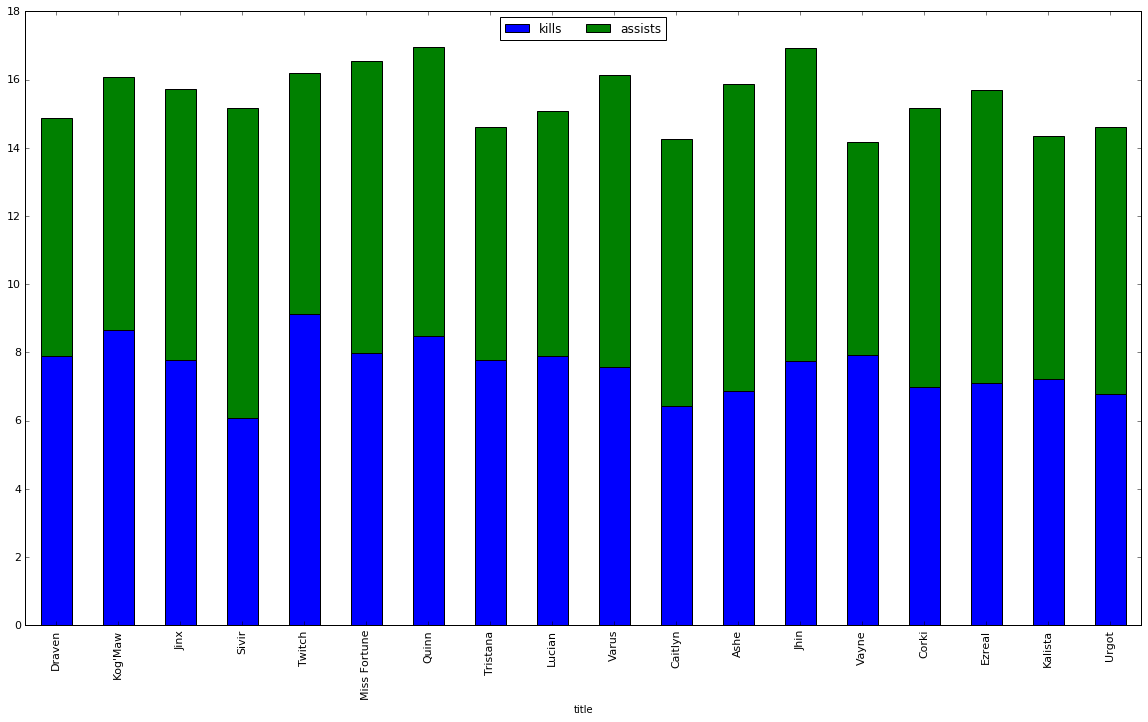

In [23]:
graf = adc.sort_values(['goldEarned'],ascending=[False])[['kills','assists']].plot(kind='bar',stacked=True,fontsize=11,figsize=(20,11))
graf.legend(loc=9, ncol=8)

Graf prikazuje razmerje med udeležbo junaka v uboje dugih junakov (se pravi kills in assists). v odvisnosti od zasluženega zlata. Tak graf bi bil morda bolj primeren v odvisnosti od pupularnosti, kajti tam bi verjetno opazili večjo korelacijo
(V nadaljevanju)

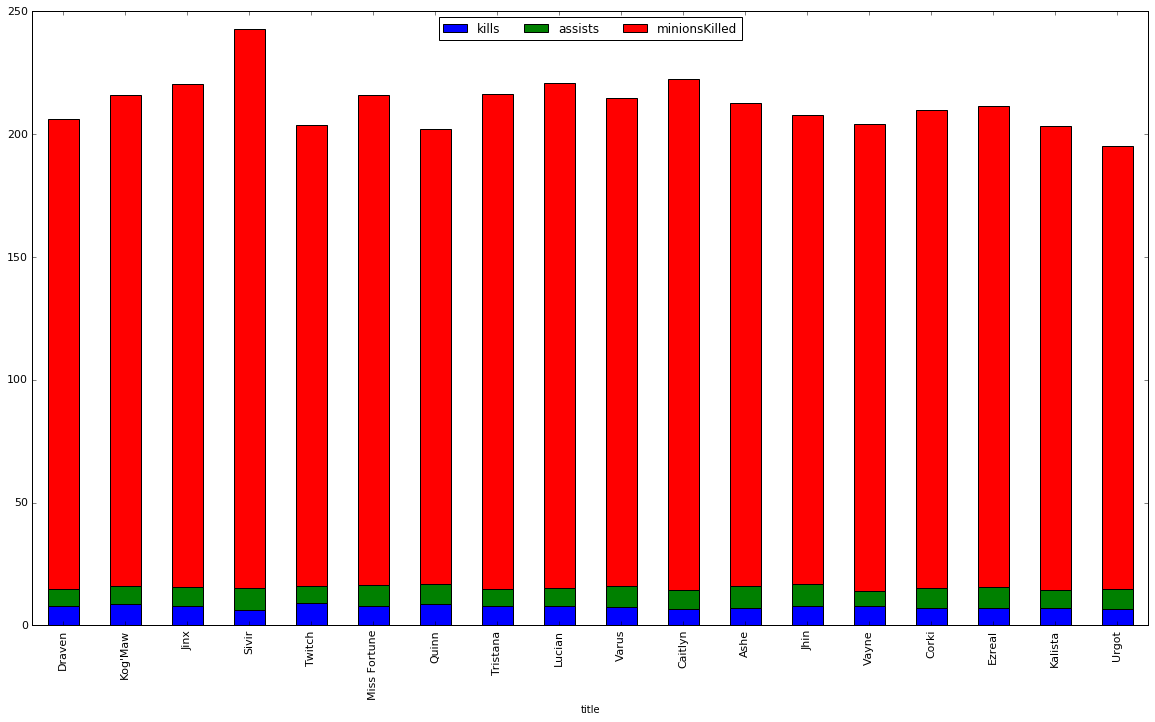

In [24]:
graf = adc.sort_values(['goldEarned'],ascending=[False])[['kills','assists','minionsKilled']].plot(kind='bar',stacked=True,fontsize=11,figsize=(20,11))
graf.legend(loc=9, ncol=8)

Graf prrikazuje razmerje med zasluženim zlatom in pa količino ubojev, pomoči pri uboju in pa ubitimi minioni. Graf je nagnjen precej v levo, edina posebnost je junak Draven, ki pa ima posebno lastnost, da pri vsakem uboju zasluzi vec zlata kot ostali junaki. 

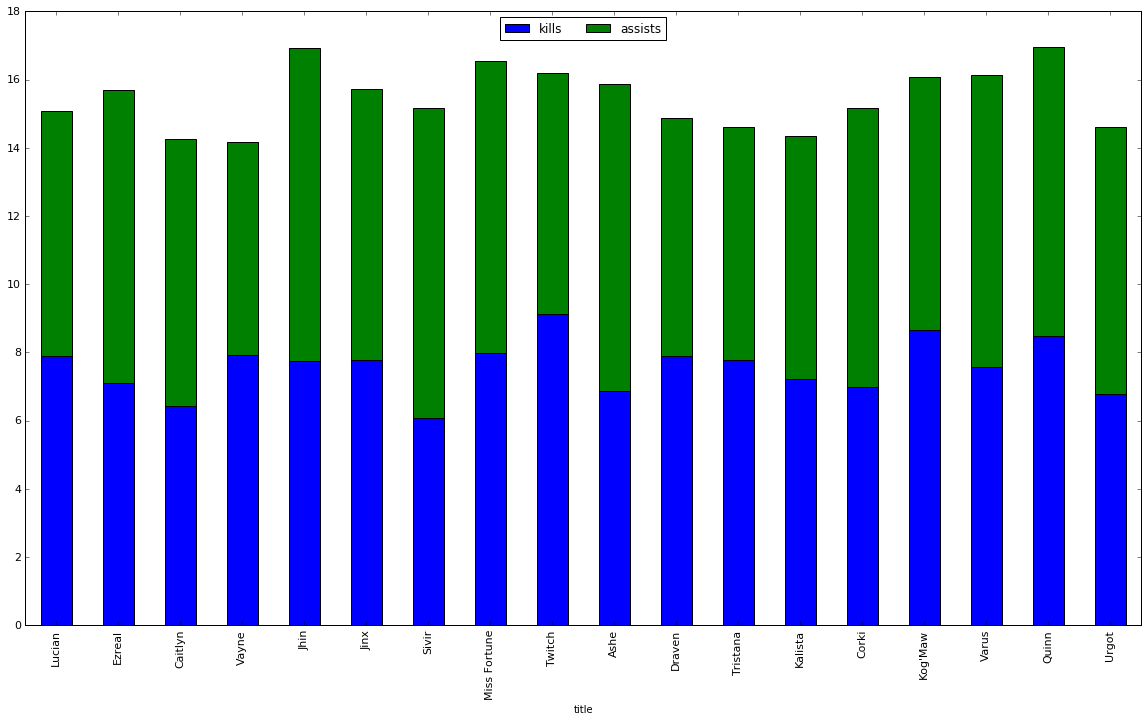

In [32]:
graf = adc.sort_values(['playPercent'],ascending=[False])[['kills','assists']].plot(kind='bar',stacked=True,fontsize=11,figsize=(20,11))
graf.legend(loc=9, ncol=8)

Graf je zgoraj obljubljeni graf razmerja med popularnostjo junaka in pa udeležbo junaka, pri ubojih nasprotnikov. Pričakoval sem precej večjo nagnjenost na levo, vendar pa je na zgornjem grafu ni opaziti.

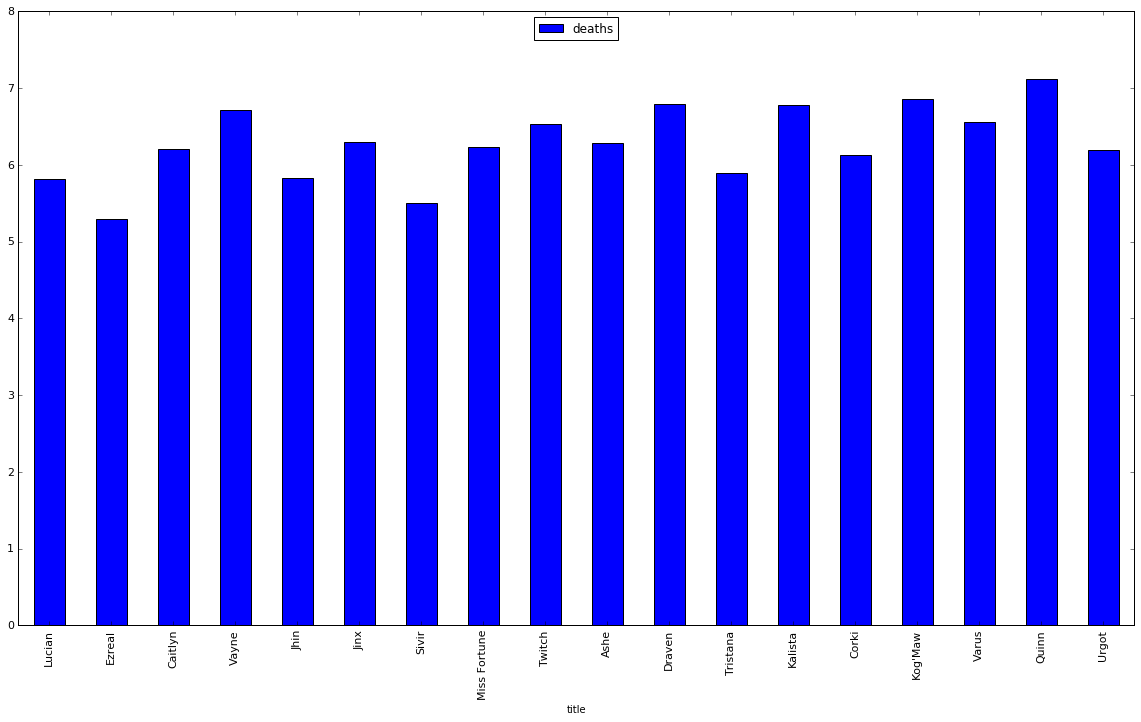

In [25]:
graf = adc.sort_values(['playPercent'],ascending=[False])[['deaths']].plot(kind='bar',stacked=True,fontsize=11,figsize=(20,11))
graf.legend(loc=9, ncol=8)

Graf prikazuje razmerje med popularnostjo posameznega junaka in pa njegovimi smrtmi. Opazimo, da so junaki, ki več umirajo, manj popularni, kar je v skladu z pričakovanjem.